## Lakers Player Recommendations

### Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib inline

In [32]:
player_percentiles = pd.read_csv('../outputs/player_playtypes_percentiles_2015_2024.csv')

In [33]:
player_percentiles_2024 = player_percentiles[player_percentiles['SeasonYear'] == '2024-25']

In [38]:
playtype_data = pd.read_csv('../outputs/playtype_data_2015_2024.csv')

In [39]:
# Group by PLAY_TYPE and TYPE_GROUPING, then sum the POSS column
playtype_summary = playtype_data.groupby(['PLAY_TYPE', 'TYPE_GROUPING'])['POSS'].sum().reset_index()

# Rename the summed column for clarity
playtype_summary.rename(columns={'POSS': 'Total_POSS'}, inplace=True)

In [40]:
playtype_summary['ATTR_NAME'] = playtype_summary['TYPE_GROUPING'] + '_' + playtype_summary['PLAY_TYPE']

In [41]:
top_play = playtype_summary['Total_POSS'].max()
playtype_summary['Frequency'] = (playtype_summary['Total_POSS'] / top_play) * 100

In [42]:
# Sort the summary table in descending order by Total_POSS
playtype_summary.sort_values(by='Total_POSS', ascending=False)

,PLAY_TYPE,TYPE_GROUPING,Total_POSS,ATTR_NAME,Frequency
13,Spotup,Offensive,10235.6,Offensive_Spotup,100.000000
12,Spotup,Defensive,10233.4,Defensive_Spotup,99.978506
6,PRBallHandler,Defensive,9490.4,Defensive_PRBallHandler,92.719528
7,PRBallHandler,Offensive,8206.8,Offensive_PRBallHandler,80.178983
0,Cut,Offensive,3048.4,Offensive_Cut,29.782328
9,PRRollMan,Offensive,2707.3,Offensive_PRRollMan,26.449842
3,Misc,Offensive,2371.6,Offensive_Misc,23.170112
11,Postup,Offensive,2235.7,Offensive_Postup,21.842393
10,Postup,Defensive,2218.2,Defensive_Postup,21.671421
2,Handoff,Offensive,2100.5,Offensive_Handoff,20.521513


This table above shows us what attributes are more prevalent, which will help us put more weight behind certain attributes when identifying players that would be valuable additions.

### Context

**From the LeBron analysis models:** After analyzing the features deemed important towards strong net, offensive, and defensive ratings, we found that most of the key features were for the PF and C position, with the skillsets of **Defensive_PRBallHandler, Defensive_OffScreen, Defensive_PRRollMan, and Offensive_Cut** being the key skillsets. In this recommendations script, we will be looking for big men from the 2024-2025 season that have succeeded in those attributes. Based on the playtype summary above, extra weight will be put on the Defensive_PRBallHandler and Offensive_Cut attributes.

**From the Luka analysis models:** After analyzing the features deemed important towards strong net, offensive, and defensive ratings, we found that most of the key features were for the SG and SF position, with the skillsets of **Offensive_PostUp, Offensive_SpotUp, Offensive_OffScreen, and Defensive_Handoff** being the key skillsets. In this recommendations script, we will be looking for wings from the 2024-2025 season that have succeeded in those attributes. Based on the playtype summary above, extra weight will be put on the Offensive_SpotUp (mostly this) and Offensive_PostUp attributes.

### Big Man Research

In [60]:
player_percentiles_2024.sort_values(by='Defensive_PRBallHandler', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Defensive_PRBallHandler']].head(25)

,PLAYER_NAME,SeasonYear,Defensive_PRBallHandler
1201,Elfrid Payton,2024-25,0.9960
95,Alex Caruso,2024-25,0.9950
1716,Jalen Pickett,2024-25,0.9890
2843,Micah Potter,2024-25,0.9870
77,Alec Burks,2024-25,0.9820
2137,Josh Okogie,2024-25,0.9775
2071,Jordan Goodwin,2024-25,0.9760
2951,Mouhamed Gueye,2024-25,0.9740
2486,Kyle Lowry,2024-25,0.9710
2716,Marcus Sasser,2024-25,0.9710


Some big men that stand out in this guard dominated dataset are Mouhamed Gueye, Trendon Watford, Lauri Markkanen, Mitchell Robinson, Santi Aldama, and Dean Wade.

In [59]:
player_percentiles_2024.sort_values(by='Defensive_OffScreen', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Defensive_OffScreen']].head(25)

,PLAYER_NAME,SeasonYear,Defensive_OffScreen
1117,Draymond Green,2024-25,0.996
4009,Victor Wembanyama,2024-25,0.993
3458,Rudy Gobert,2024-25,0.989
2986,Naz Reid,2024-25,0.982
3076,Noah Clowney,2024-25,0.982
2159,Jrue Holiday,2024-25,0.975
1650,Jaden Ivey,2024-25,0.967
1093,Donte DiVincenzo,2024-25,0.967
1610,Ja'Kobe Walter,2024-25,0.960
1813,Jarred Vanderbilt,2024-25,0.956


Some attainable big men that stand out in this dataset are Noah Clowney, Jarred Vanderbilt (already a Laker), Onyeka Okongwu, Jabari Smith, Simone Fontecchio, and Bobby Portis.

In [58]:
player_percentiles_2024.sort_values(by='Defensive_PRRollMan', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Defensive_PRRollMan']].head(25)

,PLAYER_NAME,SeasonYear,Defensive_PRRollMan
715,Dalen Terry,2024-25,1.000
3811,Tobias Harris,2024-25,0.996
362,Brandin Podziemski,2024-25,0.992
3464,Rui Hachimura,2024-25,0.988
2332,Keon Ellis,2024-25,0.984
1727,Jalen Williams,2024-25,0.984
880,DeAndre Jordan,2024-25,0.976
1681,Jaime Jaquez Jr.,2024-25,0.972
24,Aaron Holiday,2024-25,0.967
357,Bradley Beal,2024-25,0.967


Some attainable big men that stand out in this dataset are Rui Hachimura (already a Laker), DeAndre Jordan, Bobby Portis, Jerami Grant, Maxi Kleber (already a Laker).

In [57]:
player_percentiles_2024.sort_values(by='Offensive_Cut', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Offensive_Cut']].head(25)

,PLAYER_NAME,SeasonYear,Offensive_Cut
1030,Devin Vassell,2024-25,0.997
3983,Tyrese Maxey,2024-25,0.993
2229,Kai Jones,2024-25,0.990
337,Bol Bol,2024-25,0.983
1523,Isaiah Collier,2024-25,0.983
261,Ayo Dosunmu,2024-25,0.976
1807,Jaren Jackson Jr.,2024-25,0.973
3847,Tosan Evbuomwan,2024-25,0.969
2176,Julian Strawther,2024-25,0.963
3264,Pelle Larsson,2024-25,0.959


Some big men that stand out in this guard dominated dataset are Kai Jones, Bol Bol, Dean Wade, Jalen Smith, Rui Hachimura (already a Laker).

### Big Man Research Results

Targets are identified based on identifying names that are reoccuring throughout the different key attributes and then also putting more weight on the Defensive_PRBallHandler and Offensive_Cut attributes if there are not enough names occurring more than once.

**The targets we have identified are Dean Wade, Bobby Portis, Mouhamed Gueye, and Trendon Watford.**

As for their contract situations:
- Dean Wade is an expiring contract at \$6.6 million
- Bobby Portis has a player option he will likely pick up for \$13 million
- Mo Gueye has two more years of team control at around \$2 million a year
- Trendon Watford is an UFA

In [43]:
target_bigs = ['Dean Wade', 'Bobby Portis', 'Mouhamed Gueye', 'Trendon Watford']
attributes_bigs = ['Defensive_PRBallHandler', 'Defensive_OffScreen', 'Defensive_PRRollMan', 'Offensive_Cut']

C:\Users\kevin\AppData\Local\Temp\ipykernel_19564\1770602779.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


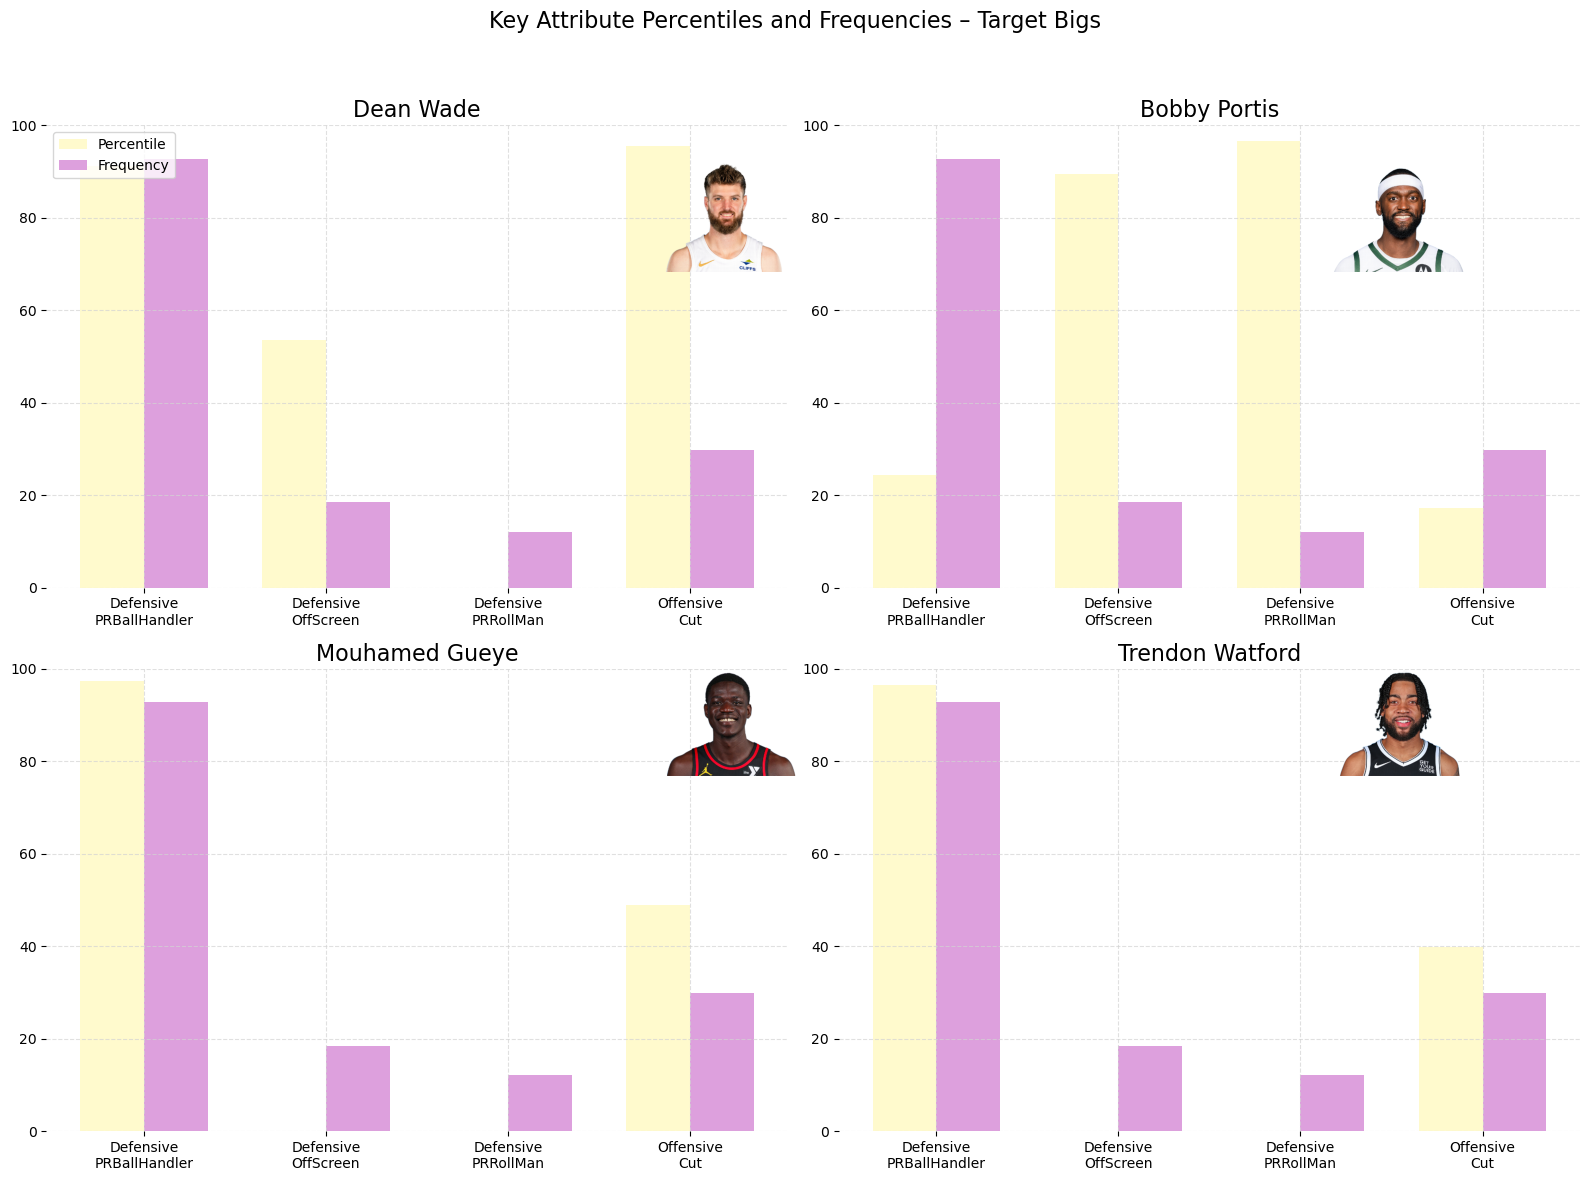

In [24]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten 2D array to 1D list for easy looping

# Build a dictionary for quick lookup of global frequencies
frequency_map = dict(zip(playtype_summary['ATTR_NAME'], playtype_summary['Frequency']))

for i, player in enumerate(target_bigs):
    ax = axs[i]
    try:
        # Get player percentile data
        player_data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player].iloc[0]
        percentiles = [player_data[attr] * 100 for attr in attributes_bigs]

        # Get frequency data for each attribute (same for all players)
        player_freqs = [frequency_map.get(attr, 0) for attr in attributes_bigs]

        # Bar positions
        x = np.arange(len(attributes_bigs))
        bar_width = 0.35

        # Plot percentile and frequency bars
        ax.bar(x - bar_width/2, percentiles, width=bar_width, color='lemonchiffon', label='Percentile')
        ax.bar(x + bar_width/2, player_freqs, width=bar_width, color='plum', label='Frequency')

        # Clean visual style
        ax.set_xticks(x)
        ax.set_xticklabels([attr.replace('_', '\n') for attr in attributes_bigs], rotation=0, ha='center')
        ax.set_ylim(0, 100)
        ax.set_title(f"{player}", fontsize=16)

        # Faint gridlines and no border
        ax.grid(True, which='both', axis='both', linestyle='--', color='lightgray', alpha=0.7)
        for spine in ['top', 'right', 'left', 'bottom']:
            ax.spines[spine].set_visible(False)

        # Add legend only to the first plot
        if i == 0:
            legend_elements = [
                Patch(facecolor='lemonchiffon', label='Percentile'),
                Patch(facecolor='plum', label='Frequency')
            ]
            ax.legend(handles=legend_elements, loc='upper left')

        # Add player image in slightly adjusted position
        image_path = f'../images/{player.lower().replace(" ", "_")}.png'
        try:
            img = mpimg.imread(image_path)
            img_ax = fig.add_axes([
                ax.get_position().x1 - 0.07,  # moved slightly more right
                ax.get_position().y1 - 0.12,
                0.1, 0.1
            ])
            img_ax.imshow(img)
            img_ax.axis('off')
        except FileNotFoundError:
            print(f"Image not found for {player}: {image_path}")

    except IndexError:
        print(f"No data found for {player}")
        ax.set_visible(False)

# Final layout
fig.suptitle("Key Attribute Percentiles and Frequencies – Target Bigs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

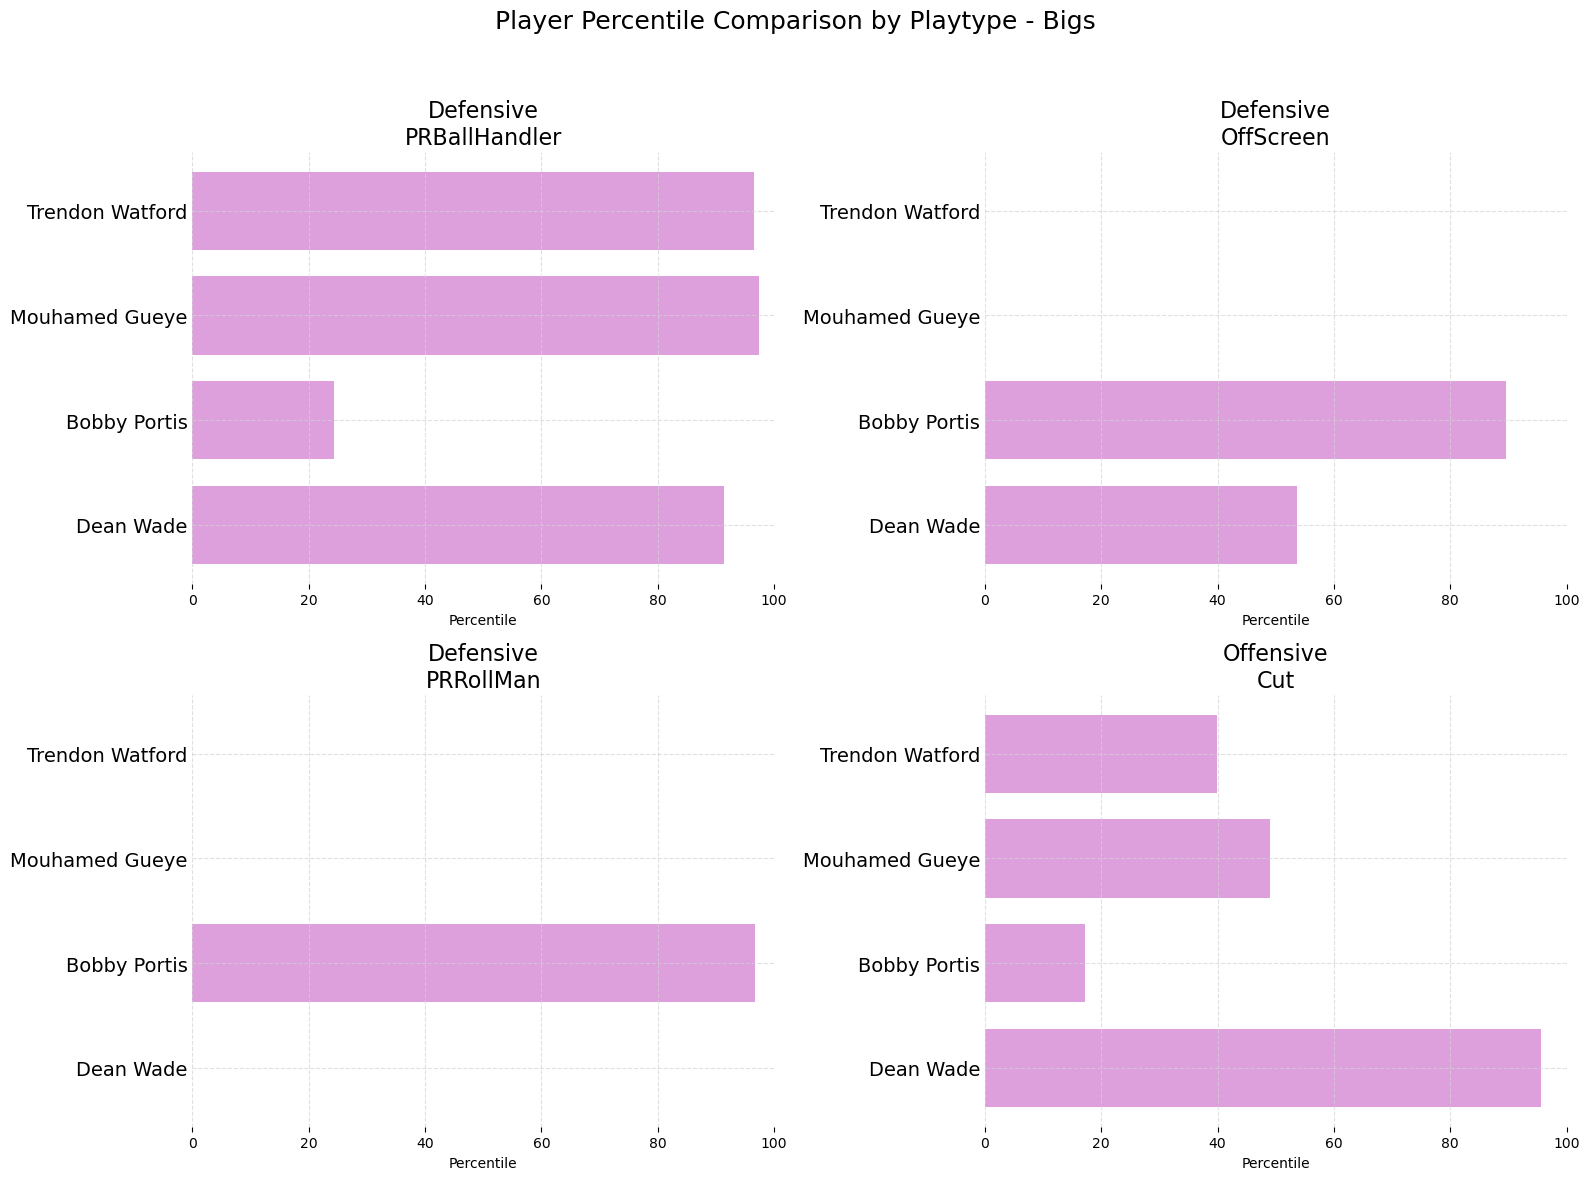

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

bar_height = 0.15  # thickness of each horizontal bar
bar_gap = 0.05     # gap between bars

for i, playtype in enumerate(attributes_bigs):
    ax = axs[i]
    
    # Get percentile values for all players for this playtype
    percentiles = []
    for player in target_bigs:
        player_row = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player]
        if not player_row.empty:
            val = player_row.iloc[0][playtype] * 100
        else:
            val = 0
        percentiles.append(val)
    
    y_positions = np.arange(len(target_bigs)) * (bar_height + bar_gap)
    
    # Plot horizontal bars for percentiles
    bars = ax.barh(y_positions, percentiles, height=bar_height, color='plum')
    
    # Set y-axis labels to player names, but hide them (we'll show images instead)
    ax.set_yticks(y_positions)
    ax.set_yticklabels(target_bigs, fontsize=14)
    
    # Set x-axis limits and labels
    ax.set_xlim(0, 100)
    ax.set_xlabel('Percentile')
    ax.set_title(playtype.replace('_', '\n'), fontsize=16)
    
    # Remove grid borders, add faint grid lines
    ax.grid(True, linestyle='--', color='lightgray', alpha=0.7)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    
    # Remove y-axis ticks (we'll rely on images instead)
    ax.tick_params(axis='y', length=0)

plt.suptitle('Player Percentile Comparison by Playtype - Bigs', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Wings Research

In [56]:
player_percentiles_2024.sort_values(by='Offensive_Postup', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Offensive_Postup']].head(25)

,PLAYER_NAME,SeasonYear,Offensive_Postup
1434,Grant Williams,2024-25,1.000
1822,Jarrett Allen,2024-25,0.992
1402,Goga Bitadze,2024-25,0.985
1609,Ja Morant,2024-25,0.977
3108,Obi Toppin,2024-25,0.969
966,Dereck Lively II,2024-25,0.962
1017,Devin Booker,2024-25,0.954
2402,Khris Middleton,2024-25,0.938
1639,Jabari Smith Jr.,2024-25,0.931
3133,Onyeka Okongwu,2024-25,0.915


Some wings that stand out in this big man dominated dataset are Khris Middleton, Harrison Barnes, Deni Avdija, and Spencer Dinwiddie.

In [55]:
player_percentiles_2024.sort_values(by='Offensive_Spotup', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Offensive_Spotup']].head(25)

,PLAYER_NAME,SeasonYear,Offensive_Spotup
2832,Maxwell Lewis,2024-25,1.000
870,De'Anthony Melton,2024-25,0.994
2553,Larry Nance Jr.,2024-25,0.992
1127,Dru Smith,2024-25,0.986
2402,Khris Middleton,2024-25,0.983
1703,Jalen Brunson,2024-25,0.981
2249,Kawhi Leonard,2024-25,0.978
4021,Vít Krejčí,2024-25,0.975
3506,Sam Hauser,2024-25,0.967
1330,Garrison Mathews,2024-25,0.964


Some attainable wings that stand out in this dataset are De'Anthony Melton, Dru Smith, Khris Middleton, Vít Krejčí, Sam Hauser, Garrison Mathews, Donte DiVincenzo, Austin Reaves (already a Laker), Grayson Allen, Malik Beasley, and Dante Exum.

In [54]:
player_percentiles_2024.sort_values(by='Offensive_OffScreen', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Offensive_OffScreen']].head(25)

,PLAYER_NAME,SeasonYear,Offensive_OffScreen
2332,Keon Ellis,2024-25,1.000
1315,Gabe Vincent,2024-25,0.995
2676,Malik Monk,2024-25,0.990
77,Alec Burks,2024-25,0.985
1002,Derrick White,2024-25,0.980
3263,Payton Pritchard,2024-25,0.975
2788,Matas Buzelis,2024-25,0.965
277,Ben Sheppard,2024-25,0.965
1639,Jabari Smith Jr.,2024-25,0.950
3977,Tyrese Haliburton,2024-25,0.940


Some attainable wings that stand out in this dataset are Keon Ellis, Gabe Vincent (already a Laker), Malik Monk, Alec Burks, Ben Sheppard, Deni Avdija, Harrison Barnes, Tyrese Martin, and Ja'Kobe Walter.

In [53]:
player_percentiles_2024.sort_values(by='Defensive_Handoff', ascending=False)[['PLAYER_NAME', 'SeasonYear', 'Defensive_Handoff']].head(25)

,PLAYER_NAME,SeasonYear,Defensive_Handoff
571,Chet Holmgren,2024-25,1.000
269,Bam Adebayo,2024-25,0.997
1712,Jalen Johnson,2024-25,0.993
2449,Kristaps Porziņģis,2024-25,0.990
2002,John Konchar,2024-25,0.990
2313,Kenrich Williams,2024-25,0.980
1030,Devin Vassell,2024-25,0.973
1807,Jaren Jackson Jr.,2024-25,0.970
3362,Ricky Council IV,2024-25,0.963
1716,Jalen Pickett,2024-25,0.960


Some wings that stand out in this big man dominated dataset are Jalen Johnson, John Konchar, Kenrich Williams, Devin Vassell, Ricky Council IV, Jalen Pickett, and Garrison Mathews.

### Wings Research Results

Targets are identified based on identifying names that are reoccuring throughout the different key attributes and then also putting more weight on the Offensive_SpotUp and Offensive_PostUp attributes if there are not enough names occurring more than once.

**The targets we have identified are Khris Middleton, Harrison Barnes, Garrison Mathews, and Deni Avdija (as a dream reach target).**

As for their contract situations:
- Khris Middleton has a player option he will likely pick up for \$34 million
- Harrison Barnes is an expiring contract at \$18 million
- Garrison Mathews is an UFA
- Deni Avdija has three more years of control starting at \$14 million in the first year then declining over the next two. Between his contract, youth, and production he will likely be the hardest to acquire but is a good dream target if the team is willing to trade some future high value draft picks.

Because many of the top recommendations above may be hard to acquire, I have also listed players that were very good at the top skillset (Offensive_Spotup) that are more attainable. These include **De'Anthony Melton, Sam Hauser, Malik Beasley, and Grayson Allen.**

As for their contract situations:
- De'Anthony Melton is an UFA
- Sam Hauser has three more years of team control at only around \$11 million per year but the Celtics may be willing to trade to get under the tax now that Jayson Tatum has a potential season ending injury.
- Malik Beasley is an UFA
- Grayson Allen has two more years of control plus a player option at around\$18 million per year but the asking price should be cheap if you are able to match salary.

In [48]:
target_wings = ['Khris Middleton', 'Harrison Barnes', 'Garrison Mathews', 'Deni Avdija']
target_wings_backup = ['De\'Anthony Melton', 'Sam Hauser', 'Malik Beasley', 'Grayson Allen']
combined_target_wings = ['Khris Middleton', 'Harrison Barnes', 'Garrison Mathews', 'Deni Avdija',
                        'De\'Anthony Melton', 'Sam Hauser', 'Malik Beasley', 'Grayson Allen']
attributes_wings = ['Offensive_Postup', 'Offensive_Spotup', 'Offensive_OffScreen', 'Defensive_Handoff']

C:\Users\kevin\AppData\Local\Temp\ipykernel_19564\4263640761.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


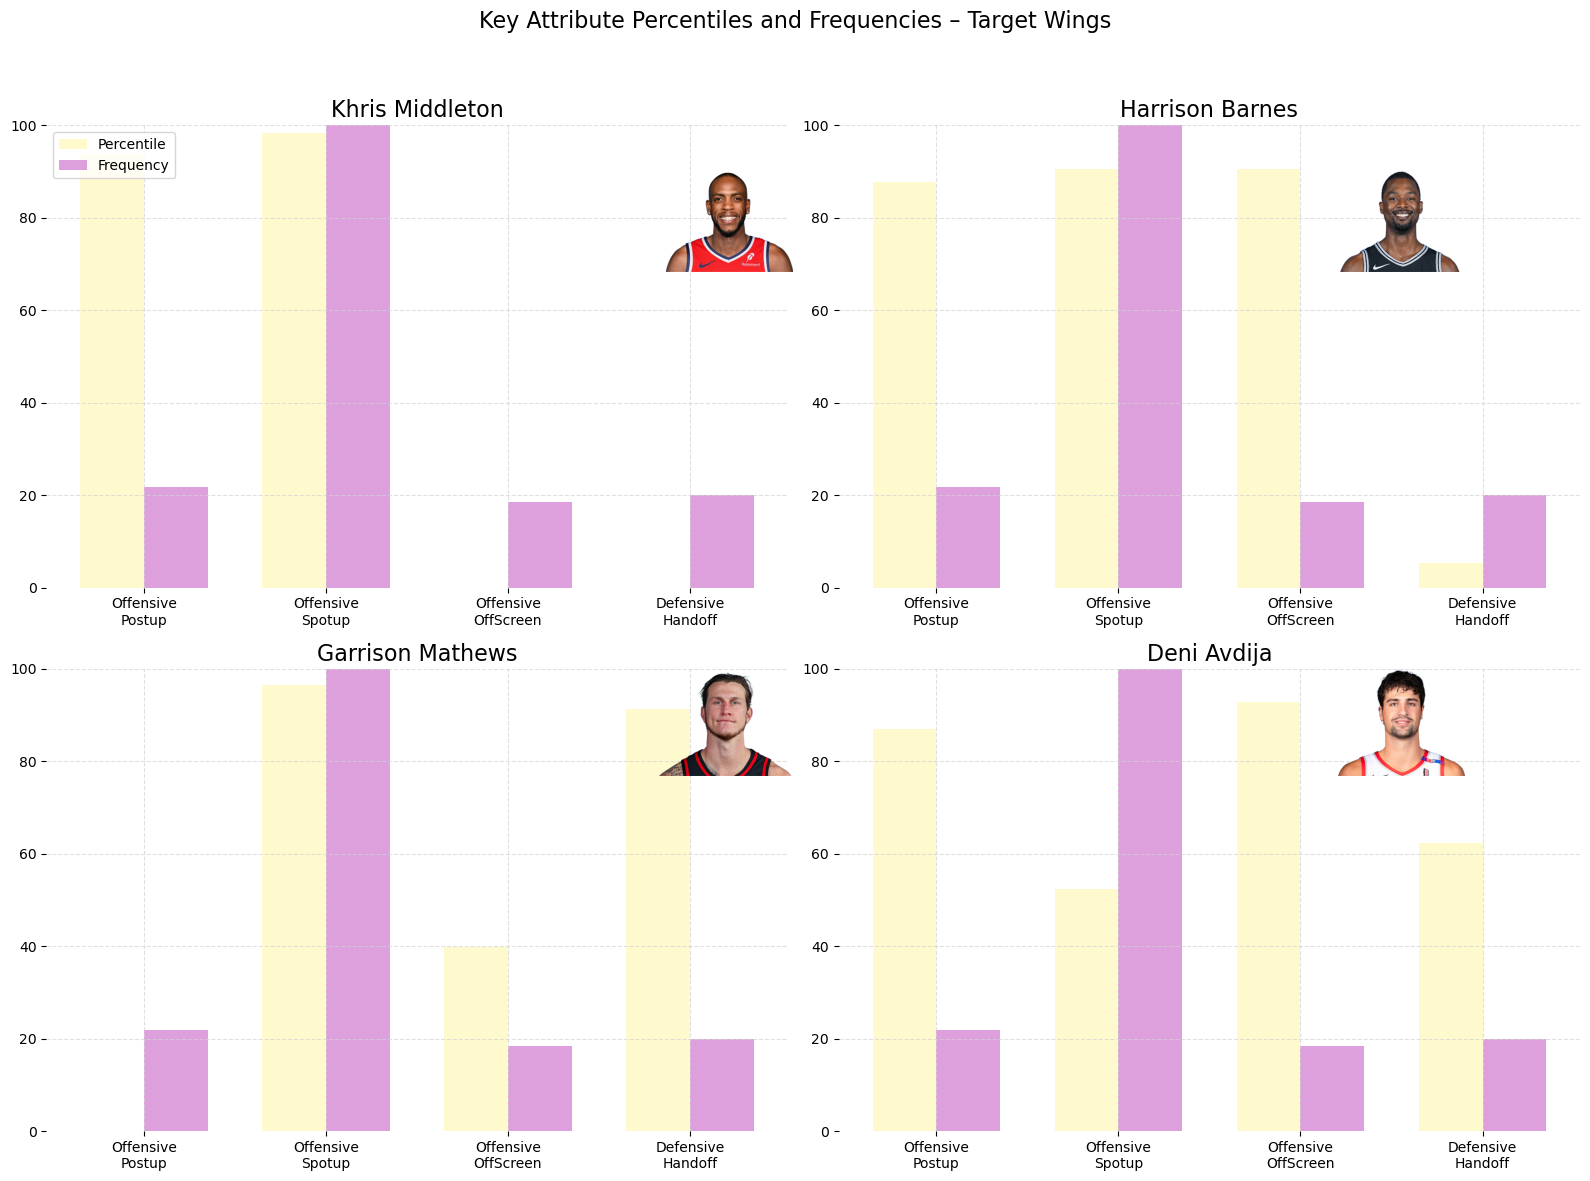

In [47]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten 2D array to 1D list for easy looping

# Build a dictionary for quick lookup of global frequencies
frequency_map = dict(zip(playtype_summary['ATTR_NAME'], playtype_summary['Frequency']))

for i, player in enumerate(target_wings):
    ax = axs[i]
    try:
        # Get player percentile data
        player_data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player].iloc[0]
        percentiles = [player_data[attr] * 100 for attr in attributes_wings]

        # Get frequency data for each attribute (same for all players)
        player_freqs = [frequency_map.get(attr, 0) for attr in attributes_wings]

        # Bar positions
        x = np.arange(len(attributes_wings))
        bar_width = 0.35

        # Plot percentile and frequency bars
        ax.bar(x - bar_width/2, percentiles, width=bar_width, color='lemonchiffon', label='Percentile')
        ax.bar(x + bar_width/2, player_freqs, width=bar_width, color='plum', label='Frequency')

        # Clean visual style
        ax.set_xticks(x)
        ax.set_xticklabels([attr.replace('_', '\n') for attr in attributes_wings], rotation=0, ha='center')
        ax.set_ylim(0, 100)
        ax.set_title(f"{player}", fontsize=16)

        # Faint gridlines and no border
        ax.grid(True, which='both', axis='both', linestyle='--', color='lightgray', alpha=0.7)
        for spine in ['top', 'right', 'left', 'bottom']:
            ax.spines[spine].set_visible(False)

        # Add legend only to the first plot
        if i == 0:
            legend_elements = [
                Patch(facecolor='lemonchiffon', label='Percentile'),
                Patch(facecolor='plum', label='Frequency')
            ]
            ax.legend(handles=legend_elements, loc='upper left')

        # Add player image in slightly adjusted position
        image_path = f'../images/{player.lower().replace(" ", "_")}.png'
        try:
            img = mpimg.imread(image_path)
            img_ax = fig.add_axes([
                ax.get_position().x1 - 0.07,  # moved slightly more right
                ax.get_position().y1 - 0.12,
                0.1, 0.1
            ])
            img_ax.imshow(img)
            img_ax.axis('off')
        except FileNotFoundError:
            print(f"Image not found for {player}: {image_path}")

    except IndexError:
        print(f"No data found for {player}")
        ax.set_visible(False)

# Final layout
fig.suptitle("Key Attribute Percentiles and Frequencies – Target Wings", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_19564\2585413115.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


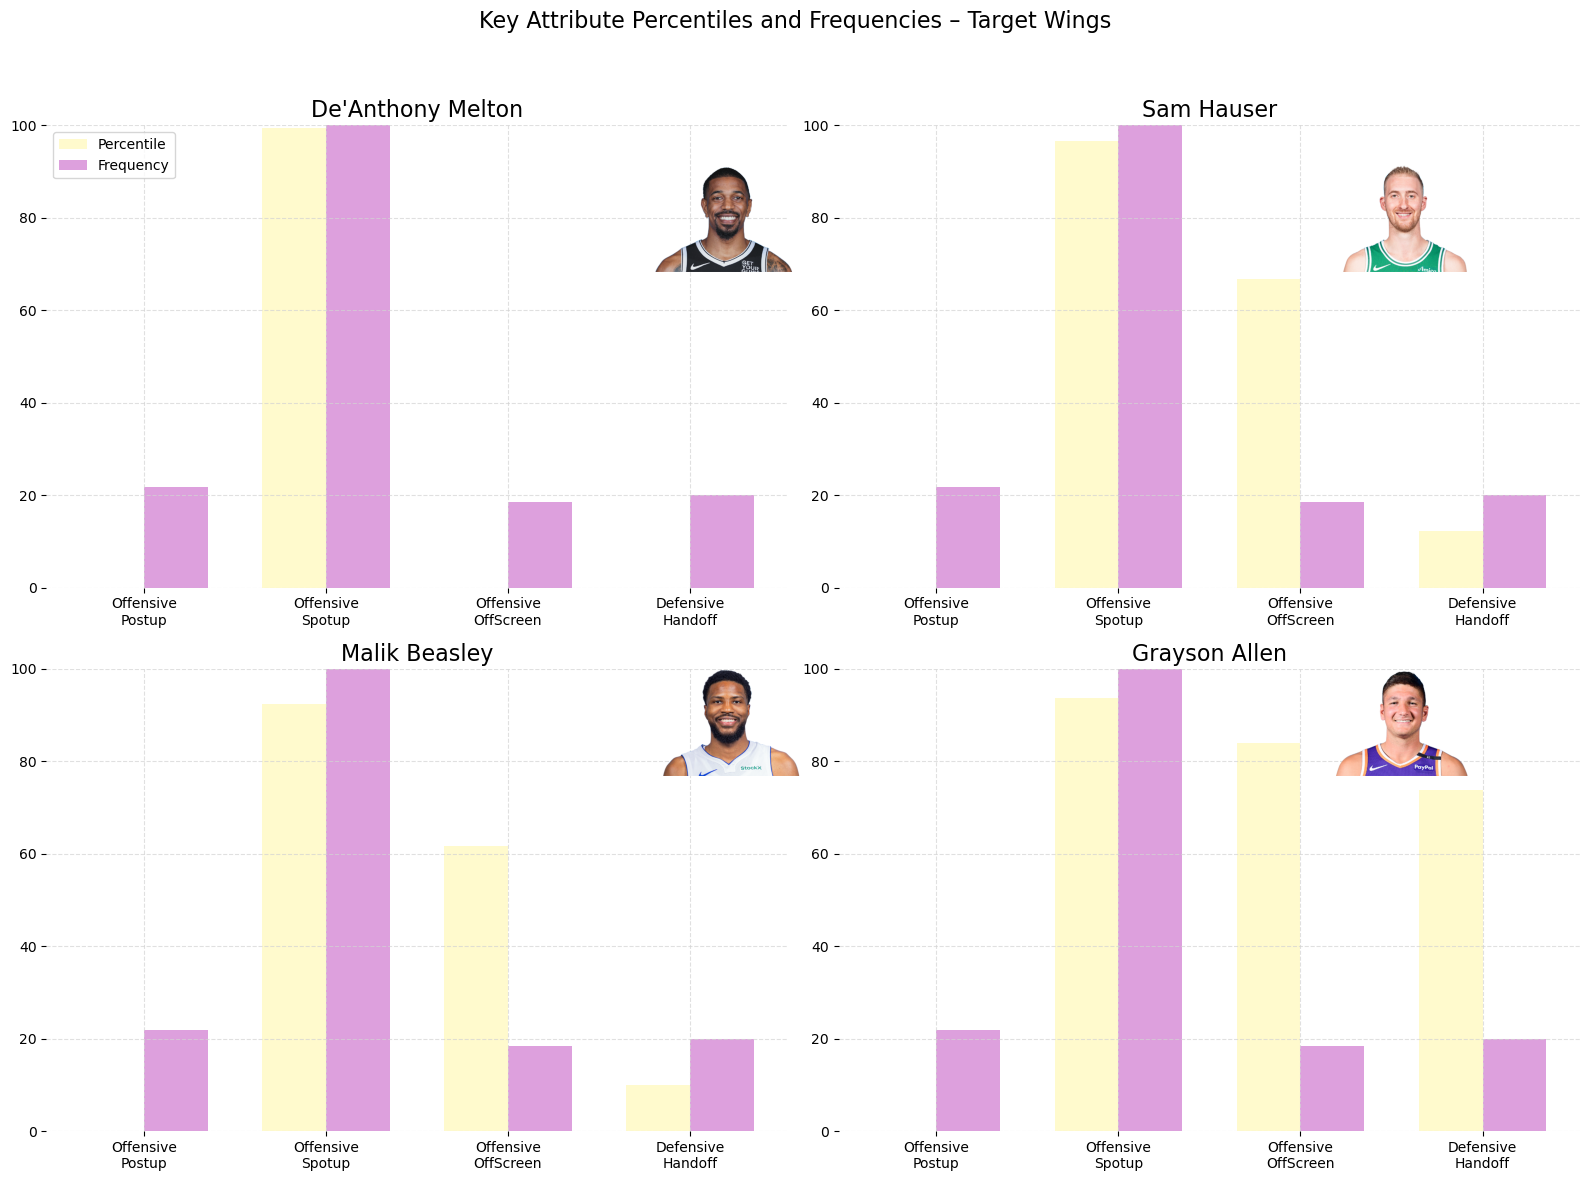

In [52]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten 2D array to 1D list for easy looping

# Build a dictionary for quick lookup of global frequencies
frequency_map = dict(zip(playtype_summary['ATTR_NAME'], playtype_summary['Frequency']))

for i, player in enumerate(target_wings_backup):
    ax = axs[i]
    try:
        # Get player percentile data
        player_data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player].iloc[0]
        percentiles = [player_data[attr] * 100 for attr in attributes_wings]

        # Get frequency data for each attribute (same for all players)
        player_freqs = [frequency_map.get(attr, 0) for attr in attributes_wings]

        # Bar positions
        x = np.arange(len(attributes_wings))
        bar_width = 0.35

        # Plot percentile and frequency bars
        ax.bar(x - bar_width/2, percentiles, width=bar_width, color='lemonchiffon', label='Percentile')
        ax.bar(x + bar_width/2, player_freqs, width=bar_width, color='plum', label='Frequency')

        # Clean visual style
        ax.set_xticks(x)
        ax.set_xticklabels([attr.replace('_', '\n') for attr in attributes_wings], rotation=0, ha='center')
        ax.set_ylim(0, 100)
        ax.set_title(f"{player}", fontsize=16)

        # Faint gridlines and no border
        ax.grid(True, which='both', axis='both', linestyle='--', color='lightgray', alpha=0.7)
        for spine in ['top', 'right', 'left', 'bottom']:
            ax.spines[spine].set_visible(False)

        # Add legend only to the first plot
        if i == 0:
            legend_elements = [
                Patch(facecolor='lemonchiffon', label='Percentile'),
                Patch(facecolor='plum', label='Frequency')
            ]
            ax.legend(handles=legend_elements, loc='upper left')

        # Add player image in slightly adjusted position
        image_path = f'../images/{player.lower().replace(" ", "_")}.png'
        try:
            img = mpimg.imread(image_path)
            img_ax = fig.add_axes([
                ax.get_position().x1 - 0.07,  # moved slightly more right
                ax.get_position().y1 - 0.12,
                0.1, 0.1
            ])
            img_ax.imshow(img)
            img_ax.axis('off')
        except FileNotFoundError:
            print(f"Image not found for {player}: {image_path}")

    except IndexError:
        print(f"No data found for {player}")
        ax.set_visible(False)

# Final layout
fig.suptitle("Key Attribute Percentiles and Frequencies – Target Wings", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

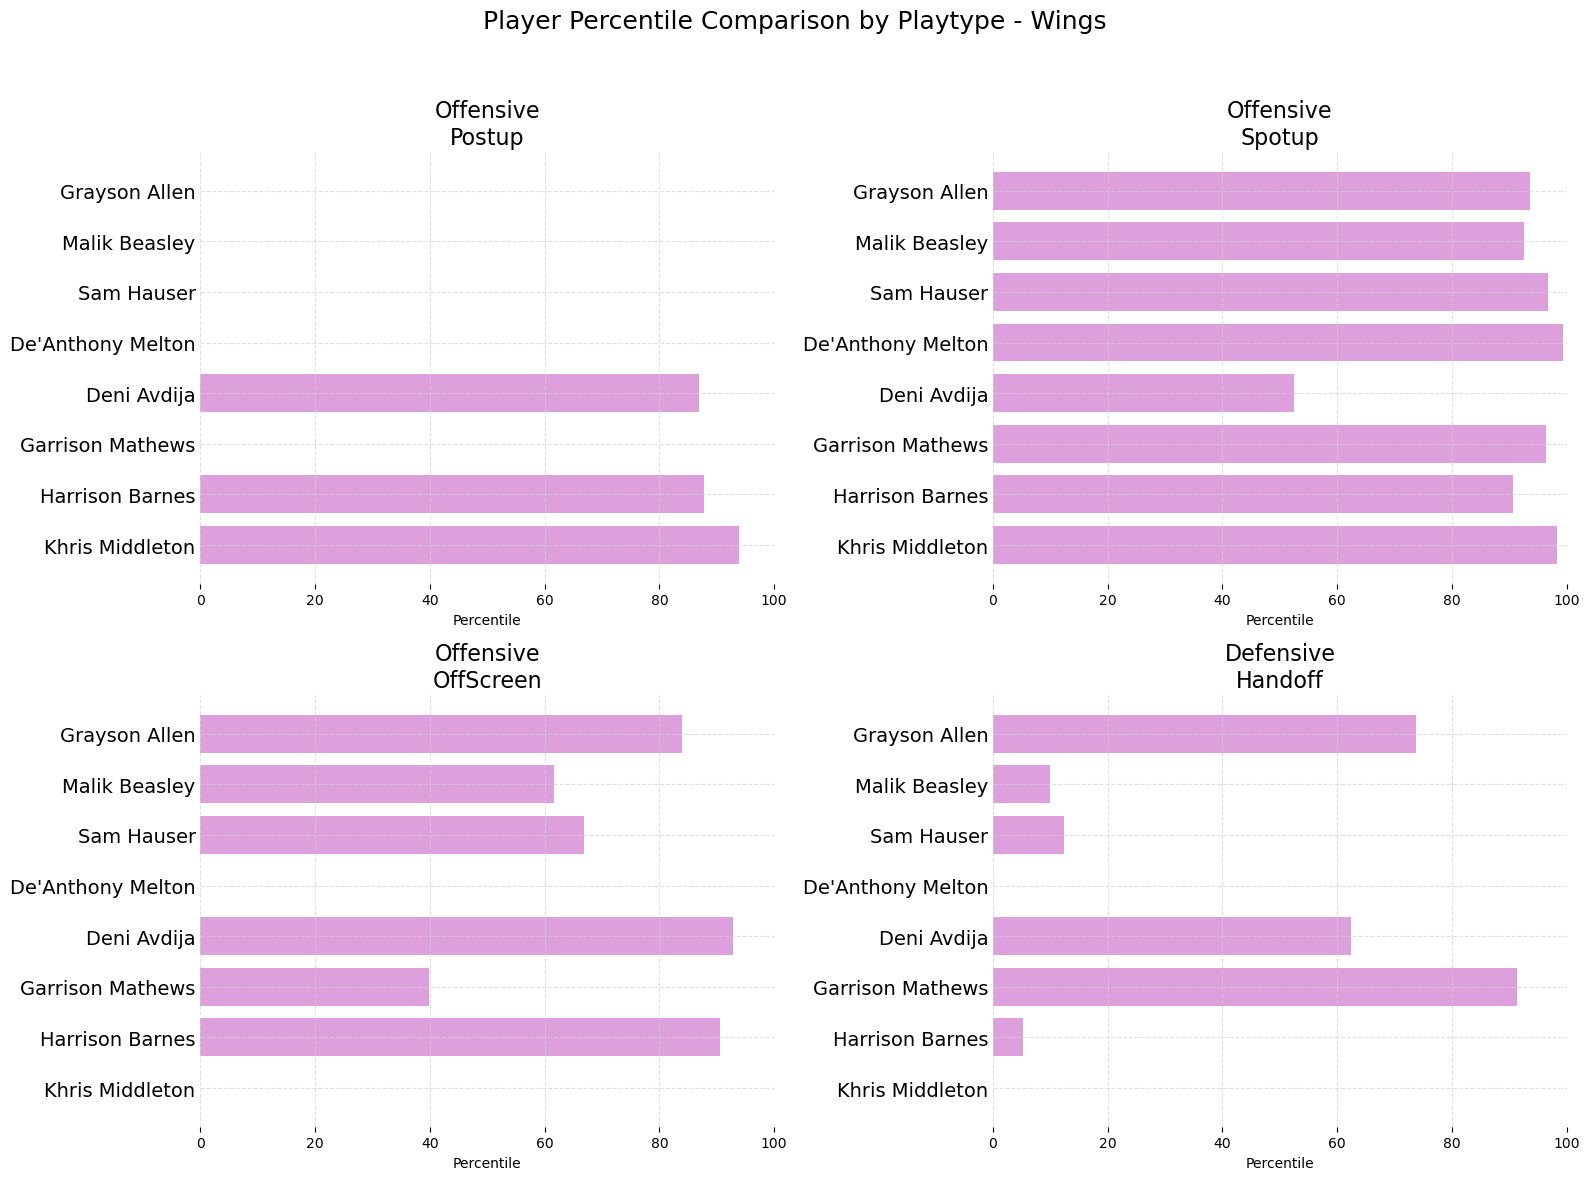

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

bar_height = 0.15  # thickness of each horizontal bar
bar_gap = 0.05     # gap between bars

for i, playtype in enumerate(attributes_wings):
    ax = axs[i]
    
    # Get percentile values for all players for this playtype
    percentiles = []
    for player in combined_target_wings:
        player_row = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player]
        if not player_row.empty:
            val = player_row.iloc[0][playtype] * 100
        else:
            val = 0
        percentiles.append(val)
    
    y_positions = np.arange(len(combined_target_wings)) * (bar_height + bar_gap)
    
    # Plot horizontal bars for percentiles
    bars = ax.barh(y_positions, percentiles, height=bar_height, color='plum')
    
    # Set y-axis labels to player names, but hide them (we'll show images instead)
    ax.set_yticks(y_positions)
    ax.set_yticklabels(combined_target_wings, fontsize=14)
    
    # Set x-axis limits and labels
    ax.set_xlim(0, 100)
    ax.set_xlabel('Percentile')
    ax.set_title(playtype.replace('_', '\n'), fontsize=16)
    
    # Remove grid borders, add faint grid lines
    ax.grid(True, linestyle='--', color='lightgray', alpha=0.7)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    
    # Remove y-axis ticks (we'll rely on images instead)
    ax.tick_params(axis='y', length=0)

plt.suptitle('Player Percentile Comparison by Playtype - Wings', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()